In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('dataset_2019041.csv',header=None)

In [12]:
df.columns = ['x', 'y' , 'z' , 'timestamp' , 'activity' , 'user']

In [121]:
df_x_timestamp = pd.DataFrame(df, columns = ['x', 'y' , 'z','activity','user'])

In [157]:
def plot_subject(user):
    plt.figure(figsize=(10,5))
    # create a plot for each column
    for col in range(user.shape[1]-1):
        plt.subplot(user.shape[1]-1, 1, col+1)
        plt.plot(user.iloc[:,col])
    plt.show()

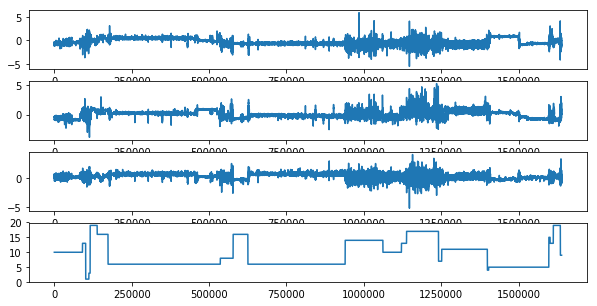

In [158]:
plot_subject(df_x_timestamp.loc[df_x_timestamp['user']==6,:])

In [79]:
subjects = [i for i in range(1,8)]
activities = [i for i in range(1,20)]

In [80]:
# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(subjects, activities):
    grouped = [{a:df_x_timestamp[df_x_timestamp.iloc[:,-1]==a] for a in activities} for s in subjects]
    return grouped

In [81]:
grouped = group_by_activity(subjects,activities)

In [105]:

# calculate total duration in sec for each activity per subject and plot
def plot_durations(grouped, activities):
    # calculate the lengths for each activity for each subject
    freq = 100
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    plt.boxplot(durations, labels=activities)
    plt.show()

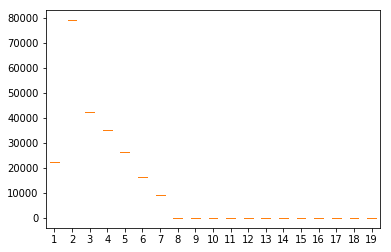

In [106]:
plot_durations(grouped, activities)

In [165]:
users = list()
for i in subjects:
    users.append(df_x_timestamp.loc[df_x_timestamp['user']==i,:])

    

In [176]:
# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    plt.figure(figsize=(20,10))
    # create a plot for each subject
    for i in range(len(subjects)):
        plt.subplot(len(subjects), 1, i+1)
        # plot each of x, y and z
        for j in range(subjects[i].shape[1]-1):
            plt.plot((subjects[i]).iloc[:,j])
    plt.show()

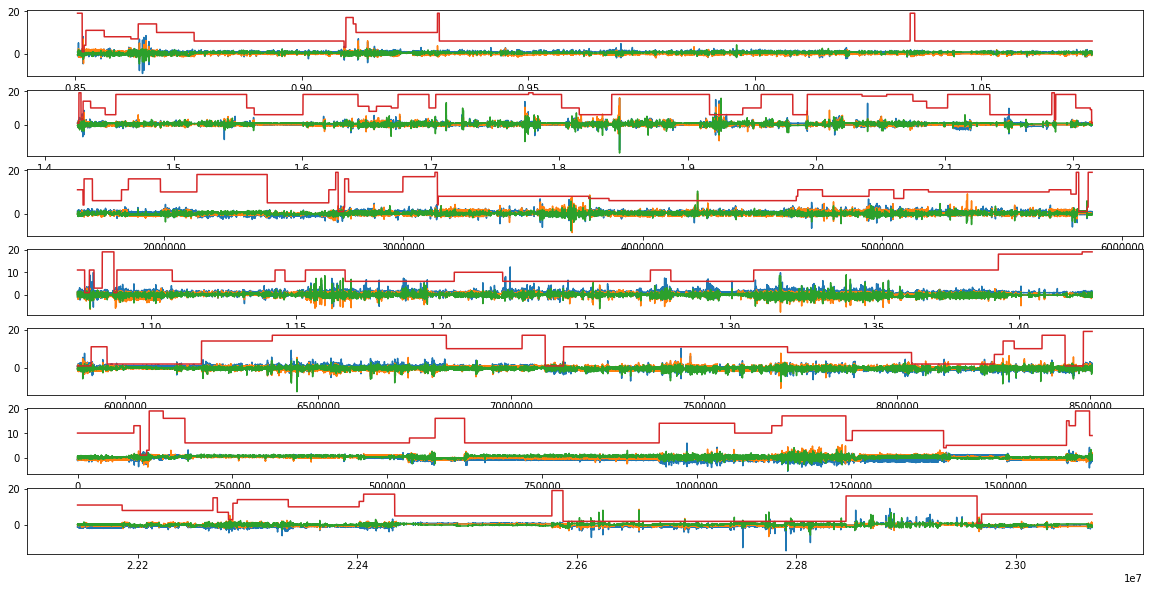

In [177]:
plot_subjects(users)